# Función de densidad de probabilidad
vs función de masa de probabilidad

## Notación

$f_x(x)$

# Distribución uniforme

$\huge f_x(x) = \frac{1}{B-A}$  si A<x<B

In [1]:
from matplotlib import pyplot as plt
import numpy as np

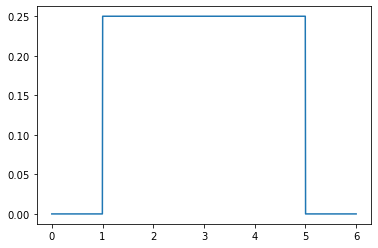

In [2]:
A = 1
B = 5
x = np.linspace(A-1, B+1, 1000)
y = ((x>A) & (x<B)) / (B-A)
plt.plot(x, y)
plt.show()

- El area debajo de la curva es 1
- Es densidad por lo que son siempre probabilidades en un intervalo que se calcula como el area de ese intervalo
- $\mu_x=\frac{A+B}{2}$
- $\sigma_x =\frac{(B-A)^2}{12}$

# Como generamos?

In [3]:
np.random.uniform(A, B, 100)

array([3.21060238, 1.29909192, 4.24867671, 2.4872623 , 2.07245097,
       3.03574159, 2.70476727, 2.85591538, 2.21044467, 1.57404615,
       2.277247  , 4.06648658, 1.30590503, 3.43604148, 2.56674887,
       3.89960828, 4.47366255, 1.29915848, 2.69152774, 2.22870663,
       4.58946587, 2.01947457, 1.62166179, 2.23650514, 4.37146809,
       3.34020577, 1.43398399, 4.41586916, 2.54576569, 1.40759808,
       2.64598584, 4.04258514, 3.839907  , 2.01119456, 2.55399768,
       4.23791319, 4.84203953, 2.98078308, 2.60967336, 4.34706279,
       1.30890147, 4.62408091, 1.88058808, 1.47414553, 2.53292256,
       4.1974196 , 1.06764882, 3.59989008, 4.54532538, 3.65843219,
       4.22346133, 2.75882723, 3.72881903, 2.1219314 , 2.57122259,
       3.19305801, 4.96782935, 4.7801581 , 1.45724365, 2.10216458,
       4.41261684, 3.75750318, 4.13463192, 2.9257492 , 2.89601722,
       4.40776337, 1.55640026, 4.24625484, 3.83956185, 3.74163559,
       3.0887364 , 1.00239486, 3.47876958, 3.39248046, 2.22207

# Distribución Gaussiana

$\huge f_x(x) = \frac{1}{\sqrt{2\pi\sigma_x^2}}e^{-\frac{(x-\mu_x)^2}{2\sigma_x^2}}$ 

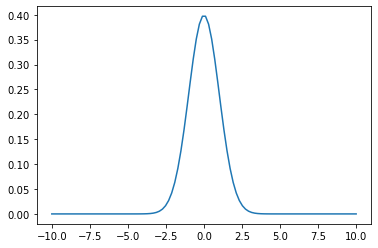

In [4]:
from scipy.stats import norm
rango = np.linspace(-10, 10, 100)
media = 0 
std = 1
pdf = norm.pdf(rango, media, std)
plt.plot(rango, pdf)
plt.show()

Cambiar media y std

# Dataset de pesos y alturas

In [5]:
import pandas as pd
df = pd.read_csv('alturas-pesos-1-train.csv')

In [15]:
df.head()

,Genero,Peso,Altura
0,Mujer,61,162
1,Hombre,97,181
2,Hombre,73,172
3,Mujer,55,157
4,Mujer,56,151


In [7]:
from collections import Counter
pesos = df['Peso'].values
peso_H =  df[df['Genero'] == 'Hombre']['Peso'].values

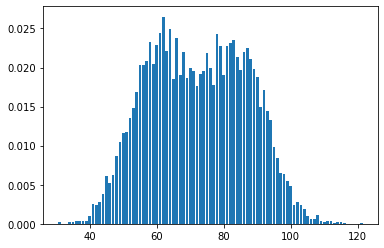

In [8]:
pesos_frecuencia = dict(Counter(pesos))
# La probabilidad es la cantidad de observaciones dividido el total
peso_prob = {pe:c/len(pesos) for pe, c in pesos_frecuencia.items()}
plt.bar(peso_prob.keys(), peso_prob.values())
plt.show()

### Es gaussiana?
Es una distribución gaussiana bimodal ,ya que es la superposición de dos distriubciones (peso de hombres y peso de mujeres)

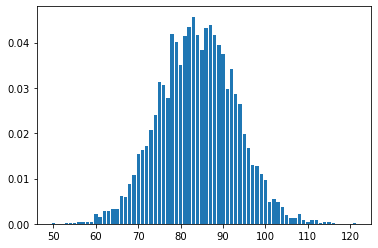

In [16]:
peso_H_frecuencia = dict(Counter(peso_H))
peso_prob_H = {pe:c/len(peso_H) for pe, c in peso_H_frecuencia.items()}
plt.bar(peso_prob_H.keys(), peso_prob_H.values())
plt.show()

Es gaussiana?

In [10]:
mean = peso_H.mean()
std = peso_H.std()
print(mean, std)

83.95577211394303 8.987069000037568


### La distribución Gaussiana queda determinada por solo dos parámetros:
Media y Varianza

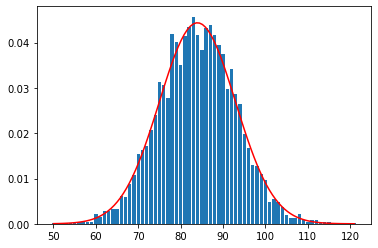

In [11]:
rango = np.linspace(peso_H.min(), peso_H.max(), 100)
pdf = norm.pdf(rango, mean, std)
plt.plot(rango, pdf, c='r')
plt.bar(peso_prob_H.keys(), peso_prob_H.values())
plt.show()

**¿Puedo analizar qué tanto se aproxima una muestra a una distribución de probabilidad normal?**
Existen tests que permiten conocer el grado de ajuste de un conjunto de datos a una Gaussiana, pero no tiene demasiado sentido analizar esto ya que ninguna distribución REAL es 100% gaussiana.

En machine learning, no nos importa tanto el enfoque estadístico del problema y buscar la manera de estimar una variable basados en una distribución de probabilidad. Lo que nos importa es que nuestro modelo de ML performe bien al estimar para nuevos datos (validación), y nos vamos a quedar con aquel modelo que de la mejor métrica, no con el que ajuste "teóricamente" mejor.

# Como generamos?

In [12]:
np.random.normal(mean, std, 100)

array([ 84.28819986,  89.77195002, 106.669509  ,  92.07565885,
        65.8815698 ,  85.44951988,  86.44860728,  83.4951085 ,
        83.93201043,  90.07446202,  79.65201674,  75.45106194,
        87.28642477,  65.5481854 ,  85.7659699 ,  98.38792695,
        81.11922589,  82.4280261 ,  94.9283444 ,  74.80542406,
        71.18593462,  70.38724829,  74.16290996,  95.46435196,
        89.3251911 ,  75.24839049,  82.73431349,  82.27723812,
        86.35450705,  82.28892045,  69.05093698,  74.93478202,
       100.69148334,  84.85267946,  76.27413049, 100.41984719,
        82.2113432 ,  84.49876256,  94.79442327,  85.26797163,
        68.77070543,  92.93617303,  91.53268208,  84.3595984 ,
        89.0131022 ,  80.00871283,  93.34609467,  84.37180772,
        83.82446895,  70.50962284,  73.6042394 ,  91.56821873,
        78.4959862 ,  82.25101102,  82.65823004,  75.62376967,
        84.91955734,  75.74109671,  93.16161332,  92.47307297,
        67.85391537,  90.10236324,  74.47553656,  77.73

# Teorema del limite central

Problema de laboratorio

Dadas $X_1$, $X_2$, $X_3$ ... $X_N$ todas V.As. i.i.d. (Intependientes e Identicamente Distribuidas)

Donde la media $E[X_i] = \mu_{x_i}$

Y la varianza $E[(X_i-\mu_{x_i})^2] = \sigma^2_{x_i} < \infty$

$S = \sum_i^N{\frac{X_i}{N}}$

La V.A S tiene distribución gaussiana con media $\mu_{x_i}$ y varianza $\sigma^2_{x_i}$ cuando N tiende a infinito

https://www.kaggle.com/c/santander-customer-transaction-prediction/data

*El CLT (Central Limit Theorem) explica por qué en tantos conjuntos de datos aparecen variables que se parecen a una distribución Gaussiana.*